In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#from scipy.stats import linregress
import json
from pprint import pprint

all_agencies = "agencies/all_agencies.csv" #this csv provides all the agencies reporting crime in the subject 4 cities
agency_df = pd.read_csv(all_agencies)

fbi_url = "https://api.usa.gov/crime/fbi/sapi/"

from config import fbi_key


agencies = agency_df["ori"]
agg_assault = []
burglary = []
larceny = []
mvt = []
homicide = []
rape = []
robbery = []
arson = []
viol_crime = []
prop_crime = []
crime = []



In [2]:
#This cell gets the response for all the agencies per year

##################################################
#for agency in agencies:

#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
    #url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2019/2019?API_KEY={fbi_key}"
    #response = requests.get(url)
    #response_json = response.json()
    
    #crime.extend(response_json["results"])

    #if we want to do specific offenses, put offenses in as {offenses}
    #print(response_json['results'])
###############################################

In [3]:
#county agencies - Reference of the county agencies assessed
#Brazos (college station) ori - TX0210000
#College Station (city) ori - TX0210200
#Waco (city) ori - TX1551200
#McLennan (Waco) ori - TX1550000
#Dallas (Dallas) ori - TX0570000
#Dallas (city) ori - TXDPD0000
#San Antonio (Bexar) ori - TX0150000
#San Antonio (city) ori - TXSPD0000

In [4]:
#for agency in agencies:
    
#`https://api.usa.gov/crime/fbi/sapi/{desired_endpiont}?api_key'
#    url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/{agency}/offenses/2018/2019?API_KEY={fbi_key}"
#    response = requests.get(url)
#    response_json = response.json()
    
#    crime.extend(response_json["results"])

#crime_all_df=pd.DataFrame(crime)
#crime_all_df


In [5]:
#crime_all_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/crime_all_df.csv')

In [6]:
crime_all_df = "crime_all_df.csv" #this csv provides all the crimes in the 4 cities
crime_all_df = pd.read_csv(crime_all_df)
crime_all_df

,Unnamed: 0,ori,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,2018,robbery,TX,0,0
1,1,TX0153500,2018,aggravated-assault,TX,31,31
2,2,TX0153500,2018,arson,TX,0,0
3,3,TX0153500,2018,burglary,TX,2,2
4,4,TX0153500,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...
2035,2035,TX1551200,2019,homicide,TX,5,10
2036,2036,TX1551200,2019,human-trafficing,TX,0,0
2037,2037,TX1551200,2019,larceny,TX,919,3492
2038,2038,TX1551200,2019,motor-vehicle-theft,TX,56,323


In [7]:
agency_df.head()

,Unnamed: 0,ori,county,name,region,lat,lon,"lat,lon"
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147"
1,1,TX0151100,BEXAR,Olmos Park Police Department,South,29.471867,-98.490600,"29.471867,-98.4906"
2,2,TX0150000,BEXAR,Bexar County Sheriff's Office,South,29.429178,-98.507170,"29.429178,-98.50717"
3,3,TX0151300,BEXAR,Terrell Hills Police Department,South,29.474962,-98.459260,"29.474962,-98.45926"
4,4,TX0150200,BEXAR,Balcones Heights Police Department,South,29.490864,-98.554760,"29.490864,-98.55476"


In [8]:
merge_df = pd.merge(agency_df, crime_all_df, on = "ori")
merge_df

,Unnamed: 0_x,ori,county,name,region,lat,lon,"lat,lon",Unnamed: 0_y,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",0,2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",1,2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2,2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",3,2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",4,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2035,2019,homicide,TX,5,10
2036,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2036,2019,human-trafficing,TX,0,0
2037,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2037,2019,larceny,TX,919,3492
2038,58,TX1551200,MCLENNAN,Waco Police Department,South,31.549493,-97.201472,"31.549493,-97.201472",2038,2019,motor-vehicle-theft,TX,56,323


In [9]:
#merge_df.to_csv(r'C:/Users/oscar/Desktop/Repos/Project-1/merge_df.csv')

In [10]:
####Population per county in 100 thousand units
bexar_pop=20
dallas_pop=26
mc_pop=2.56
brazos_pop=2.29
Total_pop=bexar_pop+dallas_pop+mc_pop+brazos_pop

In [11]:
county_df=merge_df.groupby("county").sum()
county_df["actual"]
total_actual_df=pd.DataFrame(county_df["actual"])
total_actual_df #this df reports the total crimes in each county

,actual
county,
BEXAR,61808
BRAZOS,34179
DALLAS,91632
MCLENNAN,47450


In [12]:
per_capita= (total_actual_df/Total_pop).round(0)
per_capita_df=pd.DataFrame(per_capita)
per_capita_df #this df reports the total crimes in each county per capita

,actual
county,
BEXAR,1215.0
BRAZOS,672.0
DALLAS,1802.0
MCLENNAN,933.0


In [13]:
by_countyoffense=merge_df.groupby(["county","offense"]).sum()["actual"]
by_countyoffense_df=pd.DataFrame(by_countyoffense)
by_countyoffense_df #df to analyze offenses for each county

actual
county   offense                    
BEXAR    aggravated-assault     2186
         arson                   176
         burglary               4499
         homicide                 44
         human-trafficing          0
         larceny               20678
         motor-vehicle-theft    2289
         property-crime        27466
         rape                    607
         rape-legacy              33
         robbery                 480
         violent-crime          3350
BRAZOS   aggravated-assault     1162
         arson                    33
         burglary               2421
         homicide                 11
         human-trafficing          0
         larceny               11698
         motor-vehicle-theft    1028
         property-crime        15147
         rape                    456
         rape-legacy              27
         robbery                 270
         violent-crime          1926
DALLAS   aggravated-assault     2234
         arson                    82
         burglary               5330
         homicide                 54
         human-trafficing          0
         larceny               30215
         motor-vehicle-theft    5592
         property-crime        41137
         rape                    511
         rape-legacy             105
         robbery                1734
         violent-crime          4638
MCLENNAN aggravated-assault     2197
         arson                    82
         burglary               4063
         homicide                 18
         human-trafficing          0
         larceny               14499
         motor-vehicle-theft    1526
         property-crime        20088
         rape                    566
         rape-legacy             370
         robbery                 445
         violent-crime          3596

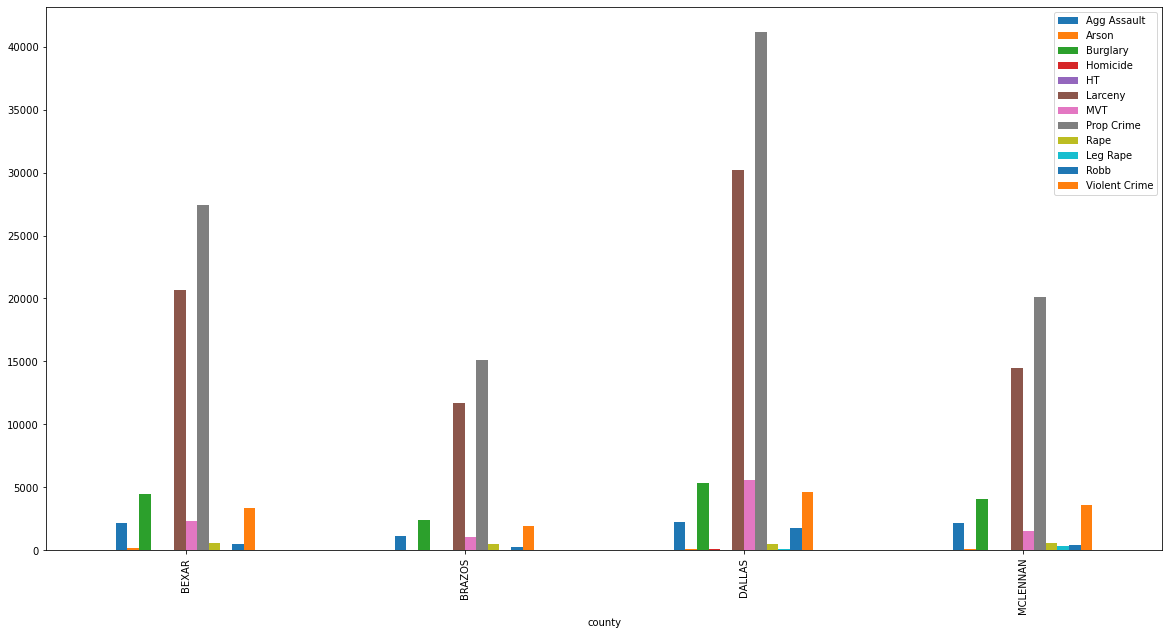

In [157]:
plot1=by_countyoffense_df.unstack().plot(kind='bar', figsize=(20,10))
plot1.legend(['Agg Assault','Arson','Burglary','Homicide','HT','Larceny','MVT','Prop Crime','Rape','Leg Rape','Robb','Violent Crime'])

In [15]:
test=merge_df.groupby(["offense","county"]).sum()["actual"]

test=pd.DataFrame(test)
test

actual
offense             county          
aggravated-assault  BEXAR       2186
                    BRAZOS      1162
                    DALLAS      2234
                    MCLENNAN    2197
arson               BEXAR        176
                    BRAZOS        33
                    DALLAS        82
                    MCLENNAN      82
burglary            BEXAR       4499
                    BRAZOS      2421
                    DALLAS      5330
                    MCLENNAN    4063
homicide            BEXAR         44
                    BRAZOS        11
                    DALLAS        54
                    MCLENNAN      18
human-trafficing    BEXAR          0
                    BRAZOS         0
                    DALLAS         0
                    MCLENNAN       0
larceny             BEXAR      20678
                    BRAZOS     11698
                    DALLAS     30215
                    MCLENNAN   14499
motor-vehicle-theft BEXAR       2289
                    BRAZOS      1028
                    DALLAS      5592
                    MCLENNAN    1526
property-crime      BEXAR      27466
                    BRAZOS     15147
                    DALLAS     41137
                    MCLENNAN   20088
rape                BEXAR        607
                    BRAZOS       456
                    DALLAS       511
                    MCLENNAN     566
rape-legacy         BEXAR         33
                    BRAZOS        27
                    DALLAS       105
                    MCLENNAN     370
robbery             BEXAR        480
                    BRAZOS       270
                    DALLAS      1734
                    MCLENNAN     445
violent-crime       BEXAR       3350
                    BRAZOS      1926
                    DALLAS      4638
                    MCLENNAN    3596

Text(0.5, 1.0, 'Crimes rates: Years: 2018-2019')

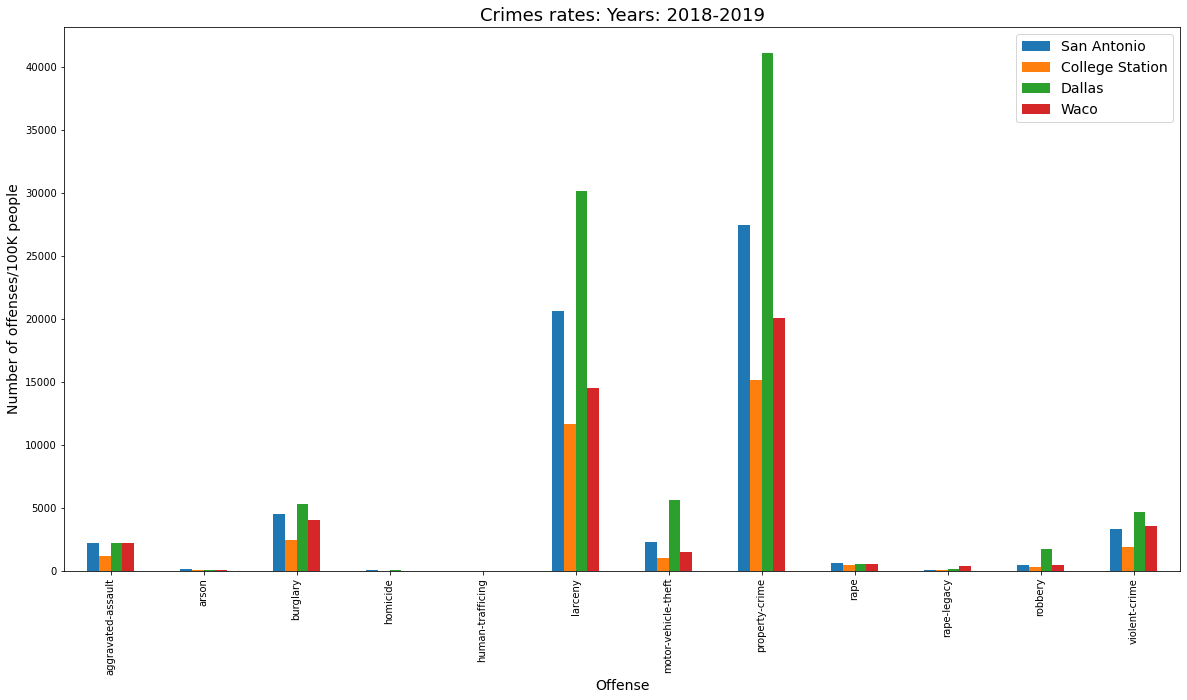

In [179]:
plot2=test.unstack().plot(kind='bar', figsize=(20,10), fontsize=10 )
plot2.legend(['San Antonio','College Station','Dallas','Waco'], fontsize=14)
plt.xlabel("Offense",fontsize=14)
plt.ylabel("Number of offenses/100K people",fontsize=14)
plt.title('Crimes rates: Years: 2018-2019',fontsize=18)

In [17]:

county_2018_df=merge_df[(merge_df.data_year==2018)]
county_2018_df=county_2018_df.groupby("county").sum()
county_2018_df=county_2018_df['actual']
county_2018_df=pd.DataFrame(county_2018_df)
county_2018_df=county_2018_df.rename(columns={"actual":2018})
county_2018_df

,2018
county,
BEXAR,40974
BRAZOS,23354
DALLAS,61408
MCLENNAN,32004


In [18]:
county_2019_df=merge_df[(merge_df.data_year==2019)]
county_2019_df=county_2019_df.groupby("county").sum()
county_2019_df=county_2019_df['actual']
county_2019_df=pd.DataFrame(county_2019_df)
county_2019_df=county_2019_df.rename(columns={"actual":2019})
county_2019_df

,2019
county,
BEXAR,20834
BRAZOS,10825
DALLAS,30224
MCLENNAN,15446


In [19]:
county_total_peryear_df=pd.concat([county_2018_df,county_2019_df], axis=1)
county_total_peryear_df


,2018,2019
county,,
BEXAR,40974,20834
BRAZOS,23354,10825
DALLAS,61408,30224
MCLENNAN,32004,15446


In [20]:
county_total_peryear_pc_df=(county_total_peryear_df/(Total_pop)).round(0)
county_total_peryear_pc_df

,2018,2019
county,,
BEXAR,806.0,410.0
BRAZOS,459.0,213.0
DALLAS,1208.0,594.0
MCLENNAN,629.0,304.0


In [21]:
year_county=merge_df.groupby(["data_year",'county']).sum()["actual"]
year_county_df=pd.DataFrame(year_county)
year_county_pc_df=(year_county_df/Total_pop).round(0)

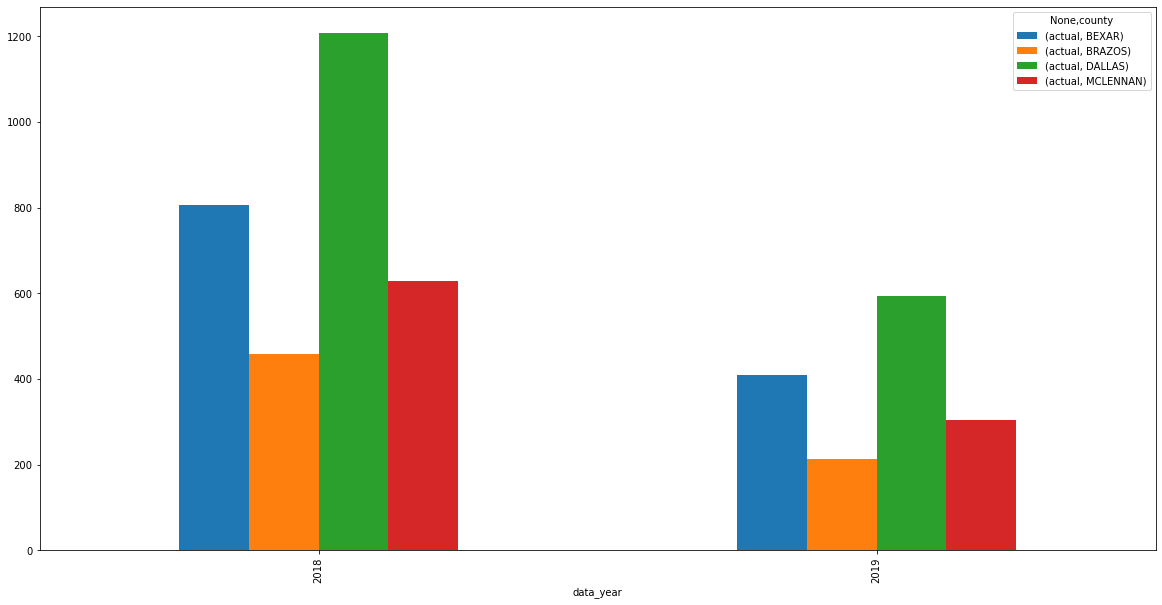

In [22]:
plot3=year_county_pc_df.unstack().plot(kind='bar', figsize=(20,10))

In [23]:
west_df=merge_df[(merge_df.county=="BRAZOS")|(merge_df.county=="BEXAR")]
west_df

,Unnamed: 0_x,ori,county,name,region,lat,lon,"lat,lon",Unnamed: 0_y,data_year,offense,state_abbr,cleared,actual
0,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",0,2018,robbery,TX,0,0
1,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",1,2018,aggravated-assault,TX,31,31
2,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",2,2018,arson,TX,0,0
3,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",3,2018,burglary,TX,2,2
4,0,TX0153500,BEXAR,Independent School District: East Central,South,29.448671,-98.520147,"29.448671,-98.520147",4,2018,homicide,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",1315,2019,larceny,TX,233,1444
956,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",1316,2019,human-trafficing,TX,0,0
957,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",1317,2019,homicide,TX,1,2
958,27,TX0210100,BRAZOS,Bryan Police Department,South,30.656725,-96.302389,"30.656725,-96.302389",1318,2019,burglary,TX,50,336


In [ ]:
######creating df for type of offense

In [ ]:
type=["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]

In [115]:
agg_assault=(merge_df[(merge_df.offense=='aggravated-assault')]['actual'].reset_index(drop=True))
arson=(merge_df[(merge_df.offense=='arson')]['actual'].reset_index(drop=True))
burglary=(merge_df[(merge_df.offense=='burglary')]['actual'].reset_index(drop=True))
homicide=(merge_df[(merge_df.offense=='homicide')]['actual'].reset_index(drop=True))
hum_traffic=(merge_df[(merge_df.offense=='human-trafficing')]['actual'].reset_index(drop=True))
larceny=(merge_df[(merge_df.offense=='larceny')]['actual'].reset_index(drop=True))
mvt=(merge_df[(merge_df.offense=='motor-vehicle-theft')]['actual'].reset_index(drop=True))
property_crime=(merge_df[(merge_df.offense=='property-crime')]['actual'].reset_index(drop=True))
rape=(merge_df[(merge_df.offense=='rape')]['actual'].reset_index(drop=True))
rape_leg=(merge_df[(merge_df.offense=='rape_legacy')]['actual'].reset_index(drop=True))
robbery=(merge_df[(merge_df.offense=='robbery')]['actual'].reset_index(drop=True))
viol_crime=(merge_df[(merge_df.offense=='violent_crime')]['actual'].reset_index(drop=True))

In [118]:
agg_assault=pd.DataFrame(agg_assault).rename(columns={'actual':'agg_assault'})
arson=pd.DataFrame(arson).rename(columns={'actual':'arson'})
burglary=pd.DataFrame(burglary).rename(columns={'actual':'burglary'})
homicide=pd.DataFrame(homicide).rename(columns={'actual':'homicide'})
hum_traffic=pd.DataFrame(hum_traffic).rename(columns={'actual':'hum_traffic'})
larceny=pd.DataFrame(larceny).rename(columns={'actual':'larceny'})
mvt=pd.DataFrame(mvt).rename(columns={'actual':'mvt'})
prop_crime=pd.DataFrame(property_crime).rename(columns={'actual':'property_crime'})
rape=pd.DataFrame(rape).rename(columns={'actual':'rape'})
robbery=pd.DataFrame(robbery).rename(columns={'actual':'robber'})
viol_crime=pd.DataFrame(viol_crime).rename(columns={'actual':'viol_crime'})







In [141]:
crimes_df=pd.concat([agg_assault,arson,burglary, homicide,larceny,mvt,prop_crime,rape,robbery], axis=1)
crimes_df=crimes_df.replace(np.nan,0)
crimes_df

,agg_assault,arson,burglary,homicide,larceny,mvt,property_crime,rape,robbery
0,31,0,2,0,7,0,9,0,0
1,31,0,2,0,7,0,9,0,0
2,24,0,3,0,15,0,18,0,0
3,1,0,5,0,17,2,24,0,0
4,1,0,5,0,17,2,24,0,0
...,...,...,...,...,...,...,...,...,...
165,101,1,77,0,544,39,660,16,11
166,73,3,68,0,514,58,640,13,13
167,501,20,1099,2,3350,328,4777,129,121
168,501,20,1099,2,3350,328,4777,129,121


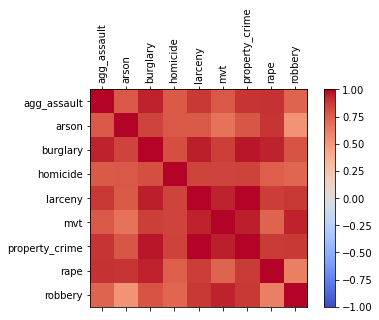

In [147]:
corr = crimes_df.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(crimes_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(crimes_df.columns)
ax.set_yticklabels(crimes_df.columns)
plt.show()
    

In [24]:
# county=['BRAZOS','MCLENNAN','BEXAR','DALLAS']
# type=["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]

# count_brazos=[]
# count_mc=[]
# count_bexar=[]
# count_dallas=[]

# for offense in type:
#     count_brazos.append(by_countyoffense_df.loc["BRAZOS",offense])
#     count_mc.append(by_countyoffense_df.loc["MCLENNAN",offense])
#     count_bexar.append(by_countyoffense_df.loc["BEXAR",offense])
#     count_dallas.append(by_countyoffense_df.loc["DALLAS",offense])

# count_brazos_all=[]
# count_mc_all=[]
# count_bexar_all=[]
# count_dallas_all=[]

# for x in range(12):
#     count_brazos_all.append(count_brazos[x]["actual"])
#     count_mc_all.append(count_mc[x]["actual"])
#     count_bexar_all.append(count_bexar[x]["actual"])
#     count_dallas_all.append(count_dallas[x]["actual"])

In [138]:
crimes_df['hum_traffic'].sum()

0

In [25]:
# by_crime_df=by_crime_df.sort_values("actual",ascending=False)
# offense_actual=by_crime_df[["actual"]]


# # Set a title for the chart
# offense_actual.plot(kind="bar", figsize=(20,3))
# plt.title("2019 Crime in San Antonio, TX")

# plt.show()
#plt.tight_layout()

In [26]:
#Group_Labels = ["aggravated-assault","arson","burglary","homicide","human-trafficing","larceny","motor-vehicle-theft","property-crime","rape","rape-legacy","robbery","violent-crime"]

